In [1]:
from keras.layers import CuDNNGRU
from keras.layers import Bidirectional
from keras.layers import CuDNNLSTM, TimeDistributed, Dropout
from keras import Sequential
from data_generator import vis_train_features
from IPython.display import Markdown, display
from data_generator import vis_train_features, plot_raw_audio
from IPython.display import Audio
import numpy as np
from data_generator import AudioGenerator
from keras import backend as K
from utils import int_sequence_to_text
from IPython.display import Audio
from keras.models import load_model
import pickle
%matplotlib inline


Using TensorFlow backend.


There are 134705 total training examples.


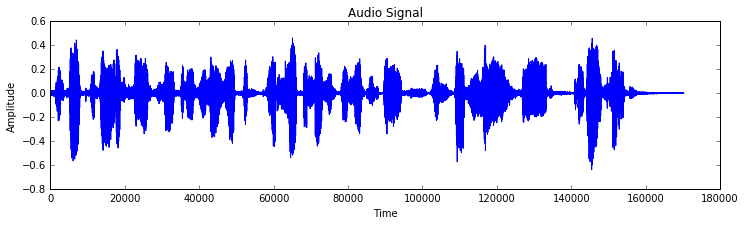

**Shape of Audio Signal** : (170226,)

**Transcript** : in fact the date i curious to know if any of you know what happened on this momentous date it was february two thousand and eight

In [2]:
# extract label and audio features for a single training example
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features(index=2)
# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)

In [3]:
#####################################################################
# RUN THIS CODE CELL IF YOU ARE RESUMING THE NOTEBOOK AFTER A BREAK #
#####################################################################

# allocate 50% of GPU memory (if you like, feel free to change this)
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf 
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.99
set_session(tf.Session(config=config))

# watch for any changes in the sample_models module, and reload it automatically
%load_ext autoreload
%autoreload 2
# import NN architectures for speech recognition
#from sample_models
# import function for training acoustic model

from keras.models import load_model
from keras import backend as K
from keras.models import Model
from keras.layers import (BatchNormalization, Conv1D, Dense, Input, Conv2D, 
    TimeDistributed, Activation, Bidirectional, SimpleRNN, GRU, LSTM)
import tensorflow as tf

In [4]:
from keras.models import load_model
from data_generator import AudioGenerator
import pickle as pickle

from keras import backend as K
from keras.models import Model
from keras.layers import (Input, Lambda)
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint   
import os

In [5]:
tf.__version__

'1.2.0'

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11194696505779839958
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 280100864
locality {
  bus_id: 1
}
incarnation: 15801726170333050991
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0"
]


In [7]:
def bidirectional_rnn_model(input_dim, units, output_dim=29):
    """ Build a bidirectional recurrent network for speech
    """
    drop=0.4  #0.7
    input_data = Input(name='the_input', shape=(None, input_dim))
    # TODO: Add recurrent layers, each with batch normalization
    layer1 = Bidirectional(CuDNNLSTM(units=units,return_sequences=True), merge_mode='concat')(input_data)
    drop1 = Dropout(drop)(layer1)
    bn_rnn1 =BatchNormalization()(drop1)
    #drop1 = Dropout(0.7)(bn_rnn1)
    layer2 = Bidirectional(CuDNNLSTM(units=units, return_sequences= True), merge_mode='concat')(bn_rnn1)
    drop2 = Dropout(drop)(layer2)
    bn_rnn2 =BatchNormalization()(drop2)
    #drop2 = Dropout(0.7)(bn_rnn2)
    layer3 = Bidirectional(CuDNNLSTM(units=units, return_sequences= True), merge_mode='concat')(bn_rnn2)
    drop3 = Dropout(drop)(layer3)
    bn_rnn3 =BatchNormalization()(drop3)
    layer4 = Bidirectional(CuDNNLSTM(units=units, return_sequences= True), merge_mode='concat')(bn_rnn3)
    drop4 = Dropout(drop)(layer4)
    bn_rnn4 =BatchNormalization()(drop4)
    layer5 = Bidirectional(CuDNNLSTM(units=units, return_sequences= True), merge_mode='concat')(bn_rnn4)
    drop5 = Dropout(drop)(layer5)
    bn_rnn5 =BatchNormalization()(drop5)
    layer6 = Bidirectional(CuDNNLSTM(units=units, return_sequences= True), merge_mode='concat')(bn_rnn5)
    drop6 = Dropout(drop)(layer6)
    bn_rnn6 =BatchNormalization()(drop6)
    layer7 = Bidirectional(CuDNNLSTM(units=units, return_sequences= True), merge_mode='concat')(bn_rnn6)
    drop7 = Dropout(drop)(layer7)
    bn_rnn7 =BatchNormalization()(drop7)
    layer8 = Bidirectional(CuDNNLSTM(units=units, return_sequences= True), merge_mode='concat')(bn_rnn7)
    drop8 = Dropout(drop)(layer8)
    bn_rnn8 =BatchNormalization()(drop8)
    
    # TODO: Add a TimeDistributed(Dense(output_dim)) layer
    time_dense = TimeDistributed(Dense(output_dim))(bn_rnn8)
    
    # Specify the model
    y_pred = Activation('softmax', name='softmax')(time_dense)
    # Specify the model
    model = Model(inputs=input_data, outputs=y_pred)
    model.output_length = lambda x: x
    print(model.summary())
    return model

In [8]:
model_4 = bidirectional_rnn_model(input_dim=161, # change to 13 if you would like to use MFCC features
                                  units=512+32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 1088)        3076864   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 1088)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 1088)        4352      
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 1088)        7111168   
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 1088)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 1088)        4352      
__________

In [ ]:
from continue_train import train_model

In [10]:
hist = train_model(input_to_softmax=model_4, 
            pickle_path='model_23.pickle', 
            save_model_path='model_23.h5',
            load_model_path ='model_23.h5',
            train_json='train-data.json',  
            epochs =3,
            minibatch_size=16,
            optimizer=SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5),
            continue_training=True,
            spectrogram=True) # change to False if you would like to use MFCC features

Epoch 1/3
8419/8419 [==============================] - 16281s 2s/step - loss: 63.2118 - val_loss: 53.4986
Epoch 2/3
5555/8419 [==================>...........] - ETA: 1:31:54 - loss: 62.8947

KeyboardInterrupt: 

In [11]:
hist.history


{'loss': [71.98981592459496, 67.24384147892344, 63.87469582988695],
 'val_loss': [52.85210028076172, 44.497404418945315, 45.17716468811035]}

In [ ]:
'batchsize 10 and learninrate 0.002'

In [10]:
hist.history

{'loss': [46.52390564925988,
  46.094853346901836,
  45.0728370895585,
  44.467547894769176,
  44.06265061729571,
  43.50103556331704,
  43.076715503722504,
  42.75223724673996,
  42.4094589148738],
 'val_loss': [31.170799565315246,
  30.580319962501527,
  30.165584082603456,
  30.413741240501405,
  29.828545780181884,
  30.049749822616576,
  29.76962513923645,
  29.954774379730225,
  29.376708822250365]}

In [15]:
model = load_model('results/model_23.h5', custom_objects={'<lambda>': lambda y_true, y_pred: y_pred} )

In [13]:
with open('results/model_23.pickle', 'r') as f:
        model_p = pickle.load(f)

In [28]:
def get_predictions(index, partition, input_to_softmax, model_path):
    """ Print a model's decoded predictions
    Params:
        index (int): The example you would like to visualize
        partition (str): One of 'train' or 'validation'
        input_to_softmax (Model): The acoustic model
        model_path (str): Path to saved acoustic model's weights
    """
    # load the train and test data
    data_gen = AudioGenerator()
    data_gen.load_train_data()
    data_gen.load_validation_data()
    
    # obtain the true transcription and the audio features 
    if partition == 'validation':
        transcr = data_gen.valid_texts[index]
        audio_path = data_gen.valid_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    elif partition == 'train':
        transcr = data_gen.train_texts[index]
        audio_path = data_gen.train_audio_paths[index]
        data_point = data_gen.normalize(data_gen.featurize(audio_path))
    else:
        raise Exception('Invalid partition!  Must be "train" or "validation"')

    # obtain and decode the acoustic model's predictions
    input_to_softmax.load_weights(model_path)
    #input_to_softmax.summary()
    prediction = input_to_softmax.predict(np.expand_dims(data_point, axis=0), batch_size=1)
    output_length = [input_to_softmax.output_length(data_point.shape[0])] 
    pred_ints = (K.eval(K.ctc_decode(
                prediction, output_length)[0][0])+1).flatten().tolist()
    
    # play the audio file, and display the true and predicted transcriptions
    print('-'*80)
    Audio(audio_path)
    print('True transcription:\n' + '\n' + transcr)
    print('-'*80)
    print('Predicted transcription:\n' + '\n' + ''.join(int_sequence_to_text(pred_ints)))
    print('-'*80)
    return transcr , int_sequence_to_text(pred_ints)

In [30]:
y, y_had = get_predictions(index=3, 
                partition='validation',
                input_to_softmax=model_4, 
                model_path='results/model_23.h5')

--------------------------------------------------------------------------------
True transcription:

if the count were on board a strange fatality was bringing him to the presence of his rival
--------------------------------------------------------------------------------
Predicted transcription:

if the coutwer on boord a strange fatality was bringing himt the presence of his rival
--------------------------------------------------------------------------------


In [33]:
y, y_had = get_predictions(index=3, 
                partition='validation',
                input_to_softmax=model_4, 
                model_path='results/model_20.h5')

--------------------------------------------------------------------------------
True transcription:

if the count were on board a strange fatality was bringing him to the presence of his rival
--------------------------------------------------------------------------------
Predicted transcription:

if the count were on board a strange fatality was bringing him to the presence of his rival
--------------------------------------------------------------------------------


In [32]:
''.join(y_had)

'if the coutwer on boord a strange fatality was bringing himt the presence of his rival'

In [11]:
# load the train and test data
data_gen = AudioGenerator()
data_gen.load_train_data()
data_gen.load_validation_data()

In [12]:
transcr = data_gen.valid_texts[1]
audio_path = data_gen.valid_audio_paths[1]
data_point = data_gen.normalize(data_gen.featurize(audio_path))

There are 134705 total training examples.


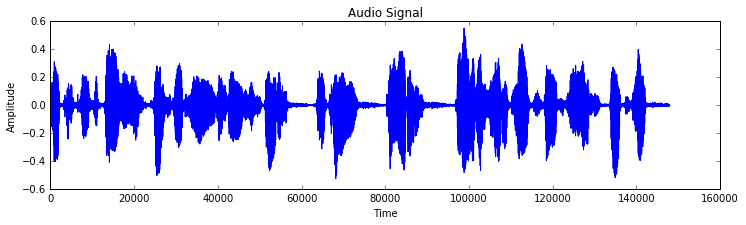

**Shape of Audio Signal** : (147956,)

**Transcript** : they conclude the following as did we in doing the study okay got it i don want to talk stage one that like

In [19]:
# extract label and audio features for a single training example
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features(index=35)
# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)

In [18]:
transcr

u'exclaimed servadac keeping his eye unmoved at his telescope'

In [14]:
data_point.shape

(400, 161)

In [15]:
data_point_expanded = np.expand_dims(data_point, axis=0)
data_point_expanded.shape

(1, 400, 161)

In [16]:
data_point_expanded_4 = np.expand_dims(data_point_expanded, axis=0)
data_point_expanded_4.shape

(1, 1, 400, 161)

In [17]:
model_path = 'results/model_23.h5'
model.load_weights(model_path)
prediction = model.predict(data_point)

NameError: name 'model' is not defined

In [20]:
batch = []
for i in range(4):
    transcr = data_gen.valid_texts[i]
    audio_path = data_gen.valid_audio_paths[i]
    data_point = data_gen.normalize(data_gen.featurize(audio_path))
    data_point_expanded = np.expand_dims(data_point, axis=0)
    batch.append(data_point_expanded)

array([[[ 1.15732416,  0.36215517, -1.04634708, ...,  3.61582465,
          6.28453825,  8.71459654],
        [ 1.18773319,  0.03801618, -0.7396043 , ...,  2.22351555,
          6.87096722,  4.93076164],
        [ 1.09163413,  0.42785151, -0.6886063 , ...,  4.12095535,
          6.29958934,  8.9289299 ],
        ...,
        [ 0.96108018,  0.33666284, -0.338117  , ...,  2.95885631,
          3.42966153,  4.80200863],
        [ 1.03706355,  0.18935651, -2.14167423, ...,  3.99624537,
          6.04943009, -0.10391304],
        [ 0.87403185,  0.21387984, -0.36418383, ...,  2.87508602,
          4.35383561,  5.28693266]]])

In [27]:
model_4.predict(data_point_expanded, batch_size=1)

array([[[0.03444368, 0.03331396, 0.03456138, ..., 0.03343928,
         0.0338084 , 0.03525832],
        [0.03465594, 0.03314417, 0.03467355, ..., 0.03334342,
         0.03383785, 0.03513351],
        [0.03484564, 0.03303141, 0.03475907, ..., 0.03322772,
         0.0339514 , 0.03497656],
        ...,
        [0.03442534, 0.03484294, 0.03654079, ..., 0.0344919 ,
         0.03582826, 0.03487182],
        [0.03431919, 0.03475552, 0.03636329, ..., 0.03448334,
         0.03557758, 0.03501994],
        [0.0342431 , 0.03458625, 0.03612196, ..., 0.03444858,
         0.03531537, 0.03515629]]], dtype=float32)